In [ ]:
# re-launch Jupyter lab as: jupyter lab --NotebookApp.iopub_data_rate_limit=1.0e10 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# plt.rcParams['figure.facecolor'] = 'w'
import random
from matplotlib import rc, animation
from IPython import display

rc('text',usetex=True)
rc('font',**{'family':'serif','serif':['Computer Modern']})#, 'size' : 18})

In [2]:
from time import time
def runtime(t0):
    dt = time() - t0
    if dt < 60:
        message = f'{dt:.0f} sec.'
    elif dt < 3600:
        message = f'{dt/60:.0f} min.'
    else:
        h = int(dt//3600)
        m = int((dt%3600) / 60)
        message = f'{h} h. {m} min.'
    print(message)

In [3]:
def wave(x, t, k, w, A=1):
    return A * np.cos(k*x - w*t)

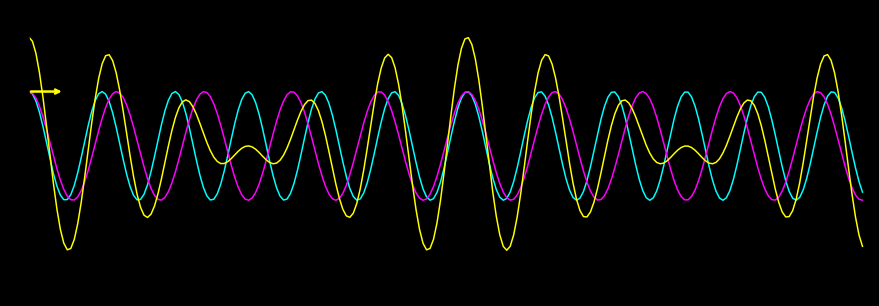

In [80]:
xmin, xmax = 0, 12
ymax = 2.5
fig = plt.figure(figsize=(15, 5))
fig.patch.set_facecolor('black')
ax = plt.axes(xlim=(xmin, xmax), ylim=(-ymax, ymax))
x = np.arange(xmin, xmax, 0.05)
k1, w1 = 6., 2.5
k2, w2 = 5., 2.3
y1 = wave(x, 0, k=k1, w=w1)
y2 = wave(x, 0, k=k2, w=w2)
ax.plot(x, y1, color='cyan')
ax.plot(x, y2, color='magenta')
ax.plot(x, y1+y2, color='yellow')
ax.set_facecolor('black')

ax.annotate('', xytext=(0, 1), xy=(0.5, 1), arrowprops={'color':'yellow', 'arrowstyle':'->', 'lw':2.5});

# Wave 1

In [ ]:
t0 = time()
# figure setup
xmin, xmax = 0, 20
ymax = 2.5
fig = plt.figure(figsize=(15, 5))
ax = plt.axes(xlim=(xmin, xmax), ylim=(-ymax, ymax))
fig.patch.set_facecolor('black')
line1, = ax.plot([], [], lw=2, color='cyan')
line2, = ax.plot([], [], lw=2, color='magenta')
# line3, = ax.plot([], [], lw=2, color='yellow')
# line4, = ax.plot([], [], lw=1, color='grey')
# line5, = ax.plot([], [], lw=1, color='grey')
# # surfers
surfer1, = ax.plot([], [], color='cyan', marker='o', alpha=.7, linewidth=2, markersize=12)
surfer2, = ax.plot([], [], color='magenta', marker='o', alpha=.7, linewidth=2, markersize=12)
surfer3, = ax.plot([], [], color='yellow', marker='o', alpha=.7, linewidth=2, markersize=12)
surfer4, = ax.plot([], [], color='white', marker='o', alpha=.7, linewidth=2, markersize=12)

# # velocity vectors
# vector_vg = ax.annotate('', xytext=(0, 2), xy=(0.5, 2), arrowprops={'color':'white', 'arrowstyle':'->', 'lw':2, 'animated':True})
# vector_vp = ax.annotate('', xytext=(0, 2), xy=(0.5, 2), arrowprops={'color':'yellow', 'arrowstyle':'->', 'lw':2, 'animated':True})

# # text
# txt_vg = ax.text([], [], r'$v_g$', color='white', fontsize=20, fontweight='bold')
# txt_vp = ax.text([], [], r'$v_p$', color='yellow', fontsize=20, fontweight='bold')


ax.set_facecolor('black')  # black plot bkgn

x = np.arange(xmin, xmax, 0.03)
# ax.set_xlabel('Distance')
# ax.set_ylabel('Amplitude')

# wave 1
k1, A1 = 5, 1
w1 = np.sqrt(k1)
v1 = w1 / k1

# wave 2
k2, A2 = 4, A1
w2 = np.sqrt(k2)
v2 = w2 / k2

# init
def init():
    line1.set_data([], [])
    line2.set_data([], [])
#     line3.set_data([], [])
#     line4.set_data([], [])
#     line5.set_data([], [])
#     surfer1.set_data([], [])
#     surfer2.set_data([], [])
#     surfer3.set_data([], [])
#     surfer4.set_data([], [])
#     vector_vp.set_position([], [])
#     vector_vg.set_position([], [])
#     txt_vg.set_position()
#     txt_vg.set_position()
    return line1, line2, line3, line4, line5, surfer1, surfer2, surfer3, surfer4, vector_vp, vector_vg, txt_vg, txt_vp

config_map = {
    'wave1' : 0, 'surfer1' : 1,
    'wave2' : 1, 'surfer2' : 1,
    'wave3' : 1, 'surfer3' : 1,
    'wave4' : 1, 'surfer4' : 1,
}


# animation
def animate(i):
    t = i * 0.1
    
    if config_map['wave1']:
        y1 = wave(x, t, k=k1, w=w1)
        line1.set_data(x, y1)
        if config_map['surfer1']:
            surfer1.set_data(v1*t, A1)
            
    if config_map['wave2']:
        y2 = wave(x, t, k=k2, w=w2)
        line2.set_data(x, y2)
        if config_map['surfer2']:
            surfer2.set_data(v2*t, A2)
    
#     if config_map['wave3']:
#         y_sum = y1 + y2
#         line3.set_data(x, y_sum)
#         if config_map['surfer3']:
#             vp = (w2 + w1) / (k2 + k1)
#             y_p = wave(vp*t, t, k=(k2-k1)/2, w=(w2-w1)/2, A=A1+A2)
#             surfer3_x, surfer3_y = vp*t, y_p
#             surfer3.set_data(surfer3_x, surfer3_y)
#             vector_vp.set_position((surfer3_x, surfer3_y))
#             vector_vp.xy = (surfer3_x + 0.9, surfer3_y)
#             txt_vp.set_position((surfer3_x + 0.3, surfer3_y+0.1))
    
#     if config_map['wave4']:
#         y_env = wave(x, t, k=(k2-k1)/2, w=(w2-w1)/2, A=A1+A2)
#         line4.set_data(x, y_env)
#         line5.set_data(x,-y_env)
#         if config_map['surfer4']:
#             vg = (w2 - w1) / (k2 - k1)
# #             y_g = wave(c_g*t, t, k=(k2-k1)/2, w=(w2-w1)/2, A=A1+A2)
#             surfer4_x, surfer4_y = vg*t, A1+A2
#             surfer4.set_data(surfer4_x, surfer4_y)
#             vector_vg.set_position((surfer4_x, surfer4_y))
#             vector_vg.xy = (surfer4_x + 0.9, surfer4_y)
#             txt_vg.set_position((surfer4_x + 0.3, surfer4_y+0.1))
    
    
    return line1, line2, line3, line4, line5, surfer1, surfer2, surfer3, surfer4, vector_vp, vector_vg, txt_vg, txt_vp

ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=400, interval=30)#, blit=True)

video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()
runtime(t0)

41 sec.


In [ ]:
t0 = time()
ani.save('animations/wave12.gif', writer = 'imagemagick', 
         savefig_kwargs={'facecolor':'black'})  # this will save the GIF with black canvas
runtime(t0)
# ~3 min

In [178]:
t0 = time()
# figure setup
xmin, xmax = 0, 20
ymax = 2.5
fig = plt.figure(figsize=(15, 5))
ax = plt.axes(xlim=(xmin, xmax), ylim=(-ymax, ymax))
fig.patch.set_facecolor('black')
line1, = ax.plot([], [], lw=2, color='cyan')
line2, = ax.plot([], [], lw=2, color='magenta')
line3, = ax.plot([], [], lw=2, color='yellow')
line4, = ax.plot([], [], lw=1, color='grey')
line5, = ax.plot([], [], lw=1, color='grey')
# surfers
surfer1, = ax.plot([], [], color='cyan', marker='o', alpha=.7, linewidth=2, markersize=12)
surfer2, = ax.plot([], [], color='magenta', marker='o', alpha=.7, linewidth=2, markersize=12)
surfer3, = ax.plot([], [], color='yellow', marker='o', alpha=.7, linewidth=2, markersize=12)
surfer4, = ax.plot([], [], color='white', marker='o', alpha=.7, linewidth=2, markersize=12)

# velocity vectors
vector_vg = ax.annotate('', xytext=(0, 2), xy=(0.5, 2), arrowprops={'color':'white', 'arrowstyle':'->', 'lw':2, 'animated':True})
vector_vp = ax.annotate('', xytext=(0, 2), xy=(0.5, 2), arrowprops={'color':'yellow', 'arrowstyle':'->', 'lw':2, 'animated':True})

# text
txt_vg = ax.text([], [], r'$v_g$', color='white', fontsize=20, fontweight='bold')
txt_vp = ax.text([], [], r'$v_p$', color='yellow', fontsize=20, fontweight='bold')


ax.set_facecolor('black')  # black plot bkgn

x = np.arange(xmin, xmax, 0.03)
# ax.set_xlabel('Distance')
# ax.set_ylabel('Amplitude')

# wave 1
k1, A1 = 5, 1
w1 = np.sqrt(k1)
v1 = w1 / k1

# wave 2
k2, A2 = 4, A1
w2 = np.sqrt(k2)
v2 = w2 / k2

# init
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    line4.set_data([], [])
    line5.set_data([], [])
#     surfer1.set_data([], [])
#     surfer2.set_data([], [])
#     surfer3.set_data([], [])
#     surfer4.set_data([], [])
#     vector_vp.set_position([], [])
#     vector_vg.set_position([], [])
#     txt_vg.set_position()
#     txt_vg.set_position()
    return line1, line2, line3, line4, line5, surfer1, surfer2, surfer3, surfer4, vector_vp, vector_vg, txt_vg, txt_vp

config_map = {
    'wave1' : 1, 'surfer1' : 1,
    'wave2' : 1, 'surfer2' : 1,
    'wave3' : 1, 'surfer3' : 1,
    'wave4' : 1, 'surfer4' : 1,
}


# animation
def animate(i):
    t = i * 0.1
    
    if config_map['wave1']:
        y1 = wave(x, t, k=k1, w=w1)
        line1.set_data(x, y1)
        if config_map['surfer1']:
            surfer1.set_data(v1*t, A1)
            
    if config_map['wave2']:
        y2 = wave(x, t, k=k2, w=w2)
        line2.set_data(x, y2)
        if config_map['surfer2']:
            surfer2.set_data(v2*t, A2)
    
    if config_map['wave3']:
        y_sum = y1 + y2
        line3.set_data(x, y_sum)
        if config_map['surfer3']:
            vp = (w2 + w1) / (k2 + k1)
            y_p = wave(vp*t, t, k=(k2-k1)/2, w=(w2-w1)/2, A=A1+A2)
            surfer3_x, surfer3_y = vp*t, y_p
            surfer3.set_data(surfer3_x, surfer3_y)
            vector_vp.set_position((surfer3_x, surfer3_y))
            vector_vp.xy = (surfer3_x + 0.9, surfer3_y)
            txt_vp.set_position((surfer3_x + 0.3, surfer3_y+0.1))
    
    if config_map['wave4']:
        y_env = wave(x, t, k=(k2-k1)/2, w=(w2-w1)/2, A=A1+A2)
        line4.set_data(x, y_env)
        line5.set_data(x,-y_env)
        if config_map['surfer4']:
            vg = (w2 - w1) / (k2 - k1)
#             y_g = wave(c_g*t, t, k=(k2-k1)/2, w=(w2-w1)/2, A=A1+A2)
            surfer4_x, surfer4_y = vg*t, A1+A2
            surfer4.set_data(surfer4_x, surfer4_y)
            vector_vg.set_position((surfer4_x, surfer4_y))
            vector_vg.xy = (surfer4_x + 0.9, surfer4_y)
            txt_vg.set_position((surfer4_x + 0.3, surfer4_y+0.1))
    
    
    return line1, line2, line3, line4, line5, surfer1, surfer2, surfer3, surfer4, vector_vp, vector_vg, txt_vg, txt_vp

ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=400, interval=30)#, blit=True)

video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()
runtime(t0)

42 sec.


In [176]:
v1, v2

(0.447213595499958, 0.5)

In [179]:
t0 = time()
ani.save('animations/waves_all.gif', writer = 'imagemagick', 
         savefig_kwargs={'facecolor':'black'})  # this will save the GIF with black canvas
runtime(t0)
# ~3 min

3 min.


In [6]:
t0 = time()
# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save('animations/waves.mp4', writer=writer)
runtime(t0)
# ~30 sec

27 sec.
